In [2]:
# STEP 1

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("googleplaystore.csv")
df.drop_duplicates(inplace=True)


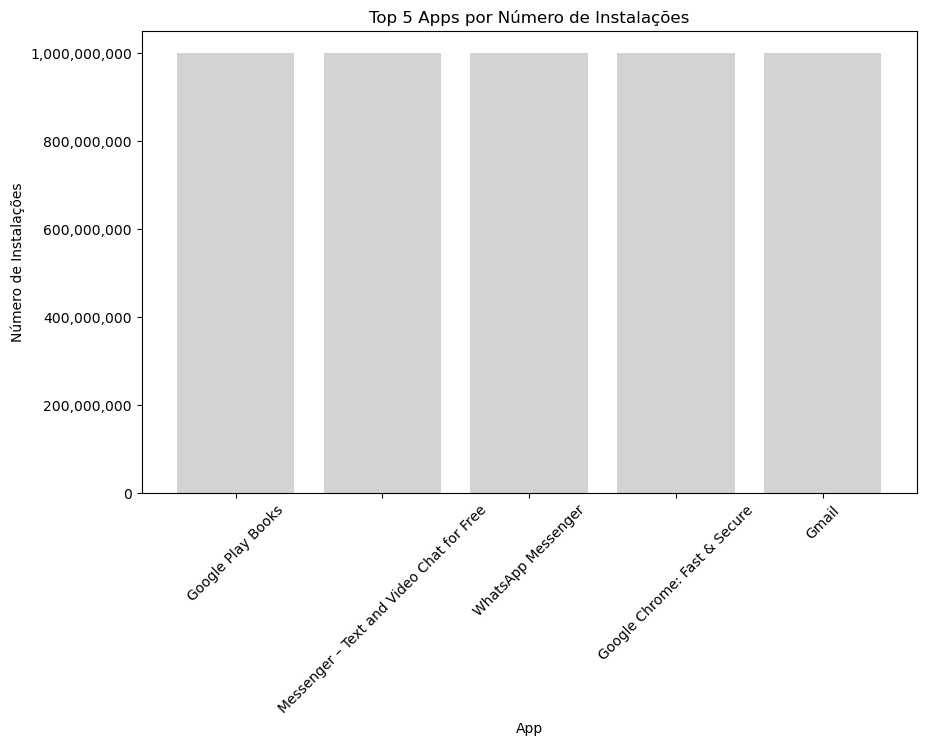

In [30]:
# STEP 2

df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df = df.dropna(subset=['Installs'])

top_5_apps_installs = df.nlargest(5, 'Installs')

plt.figure(figsize=(10, 6))
plt.bar(top_5_apps_installs['App'], top_5_apps_installs['Installs'], color='lightgrey')
plt.xlabel('App')
plt.ylabel('Número de Instalações')
plt.title('Top 5 Apps por Número de Instalações')
plt.xticks(rotation=45)

# Formatação para apresentar o número completo na coluna y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()



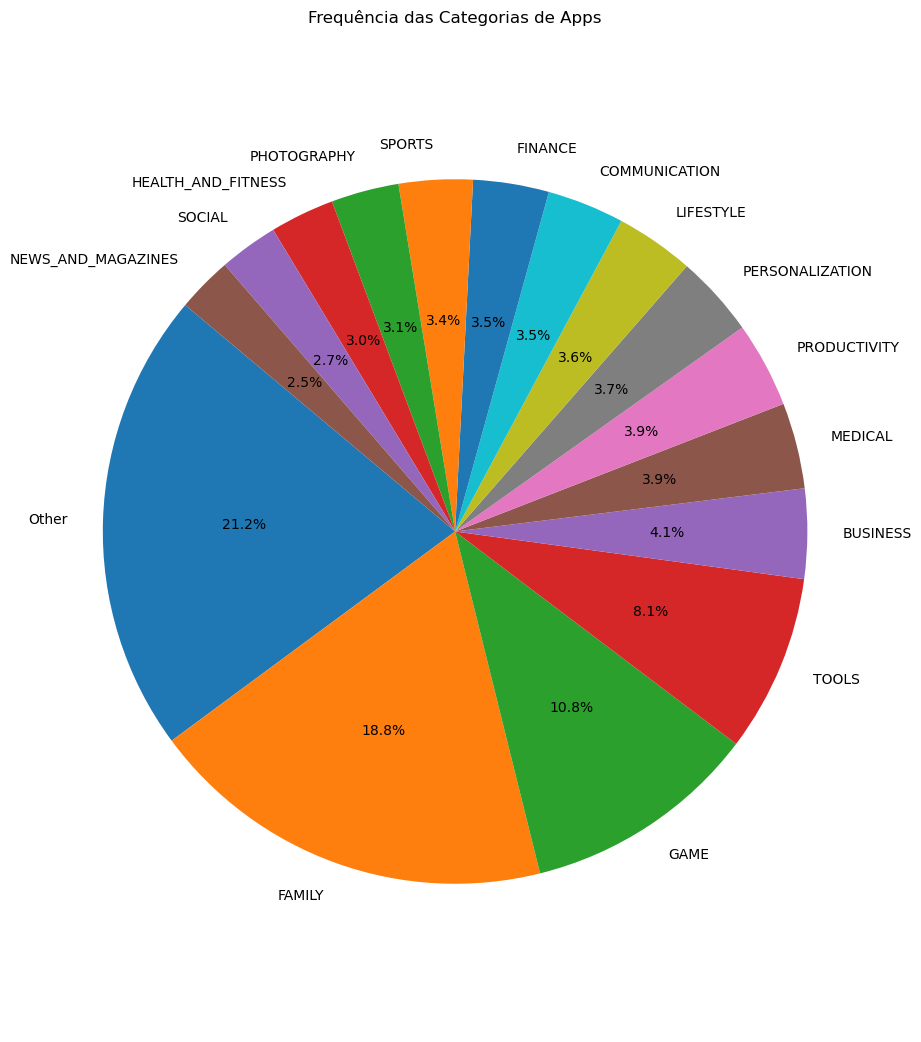

In [4]:
# STEP 3
category_counts = df['Category'].value_counts()

category_percentages = category_counts / category_counts.sum() * 100

# Agrupando categorias com percentual menor que 1.5
small_categories = category_percentages[category_percentages < 1.5].index

df['Category'] = df['Category'].replace(small_categories, 'Other')

# Frequência das categorias novamente após a substituição
category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 13))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequência das Categorias de Apps')
plt.axis('equal') 
# plt.ticks(rotation=45)
plt.show()


In [54]:
# STEP 4

df['Price'] = df['Price'].str.replace('$', '').astype(float)

biggest_price_app = df.nlargest(1, 'Price')

print('App mais caro:', biggest_price_app[['App', 'Price']])

App mais caro:                            App  Price
4367  I'm Rich - Trump Edition  400.0


In [55]:
#STEP 5

mature_17_qtd = df[df['Content Rating'] == 'Mature 17+'].shape[0]
print('Número de apps classificados como "Mature 17+":', mature_17_qtd)

Número de apps classificados como "Mature 17+": 447


In [11]:
# STEP 6

df['Reviews'] = df['Reviews'].astype(str)

# Retirando possíveis erros de formatação que impediriam de buscar o número de reviews
df['Reviews'] = df['Reviews'].str.replace('[^\d]', '', regex=True)

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df_unique = df.groupby('App', as_index=False)['Reviews'].max()

top_10_apps_reviews = df_unique.nlargest(10, 'Reviews')

print('Top 10 apps por número de reviews:')
print(top_10_apps_reviews[['App', 'Reviews']])


Top 10 apps por número de reviews:
                                                    App   Reviews
4328                                           Facebook  78158306
9042                                 WhatsApp Messenger  69119316
5399                                          Instagram  66577446
6166           Messenger – Text and Video Chat for Free  56646578
2564                                     Clash of Clans  44893888
2573            Clean Master- Space Cleaner & Antivirus  42916526
8080                                     Subway Surfers  27725352
9226                                            YouTube  25655305
7722  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
2561                                       Clash Royale  23136735


In [33]:
# STEP 7 

# Cálculo 1 - App mais caro na categoria ART_AND_DESINGN

art_and_design = df[df['Category'] == 'ART_AND_DESIGN'].copy()

art_and_design['Price'] = art_and_design['Price'].astype(str).str.replace('$', '').astype(float)

biggest_price_app_art_and_design = art_and_design.nlargest(1, 'Price')

print('App mais caro na categoria ART_AND_DESIGN:')
print(biggest_price_app_art_and_design[['App','Price']])

App mais caro na categoria ART_AND_DESIGN:
                                                    App  Price
4755  X Launcher Pro: PhoneX Theme, OS11 Control Center   1.99


In [43]:
# STEP 7 

# Cálculo 2 - Top 3 aplicativos que possuem a maior avaliação média

df_copy = df[(df['Rating'] >= 0) & (df['Rating'] <= 5)].copy()
highest_ratings = df_copy.nlargest(3,'Rating')
print('3 apps que possuem a maior avaliação média: ')
print(highest_ratings[['App','Rating']])


3 apps que possuem a maior avaliação média: 
                               App  Rating
329   Hojiboy Tojiboyev Life Hacks     5.0
612  American Girls Mobile Numbers     5.0
615                   Awake Dating     5.0


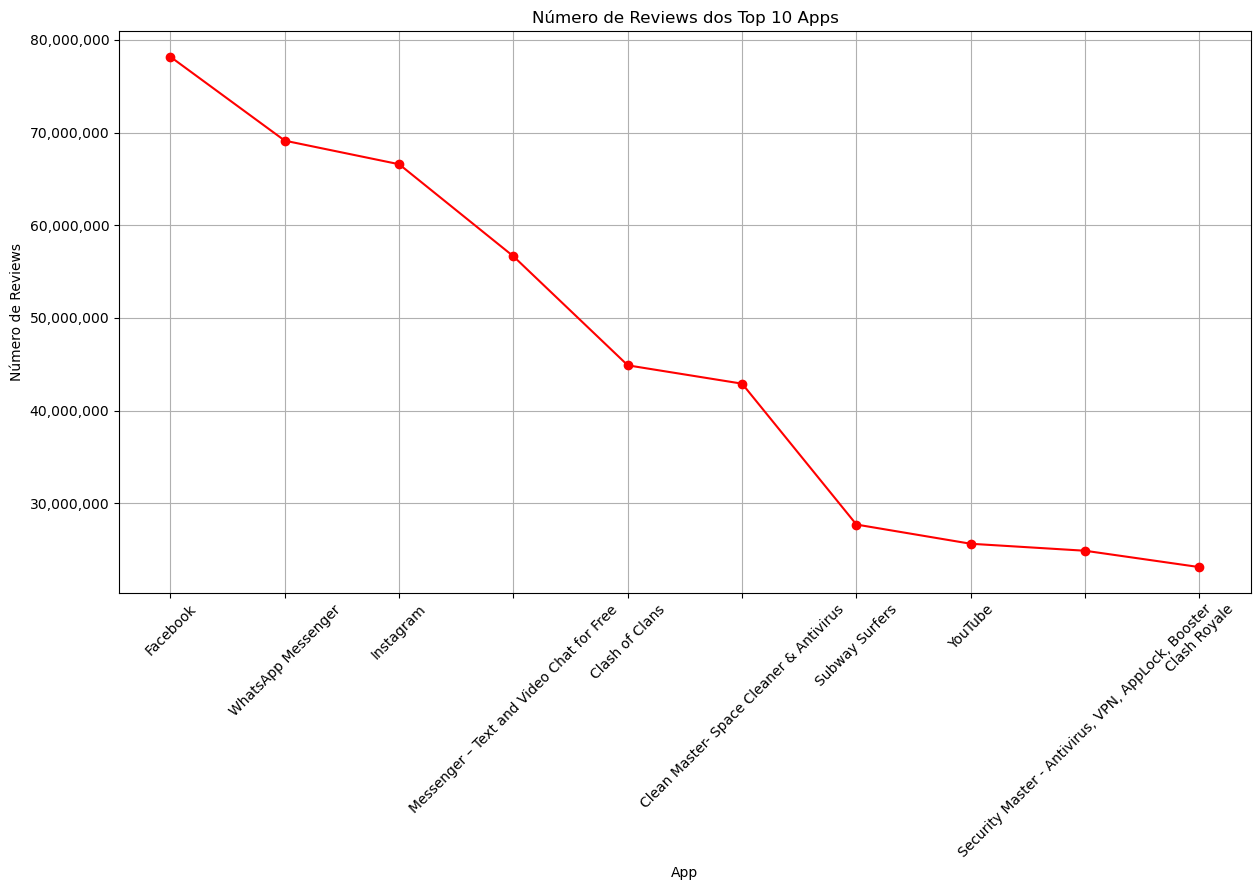

In [67]:
# STEP 8
    
# Gráfico 1 - Demonstração top 10 apps por número de reviews 
plt.figure(figsize=(12, 9))
plt.plot(top_10_apps_reviews['App'], top_10_apps_reviews['Reviews'], marker='o', linestyle='-', color='r')
plt.xlabel('App')
plt.ylabel('Número de Reviews')
plt.title('Número de Reviews dos Top 10 Apps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.grid(True)
plt.show()


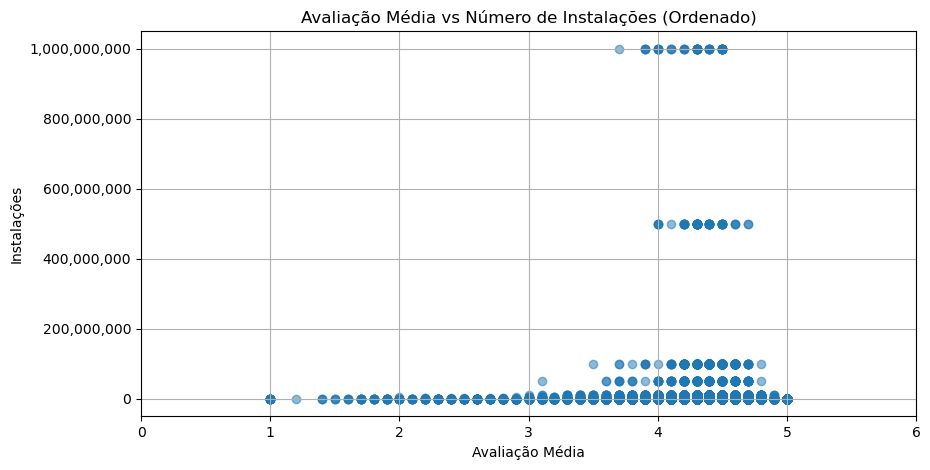

In [66]:
# STEP 8

# GRÁFICO 2

numeric_installs['Installs'] = numeric_installs['Installs'].replace('[^\d]', '', regex=True).astype(float).copy()

numeric_installs = numeric_installs.sort_values(by='Installs')

plt.figure(figsize=(10, 5))
plt.scatter(numeric_installs['Rating'], numeric_installs['Installs'], alpha=0.5)
plt.xlabel('Avaliação Média')
plt.xlim(0, 6)
plt.ylabel('Instalações')
plt.title('Avaliação Média vs Número de Instalações (Ordenado)')

#Formatação para visualizar o número completo
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.grid(True)
plt.show()
